### Mini Batch K-Means

Utiliza mini-batches para reducir el tiempo computacional para datasets con muestras >= 10k. Este algoritmo converge más rápido, sin embargo, la calidad del resultado puede ser algo menor

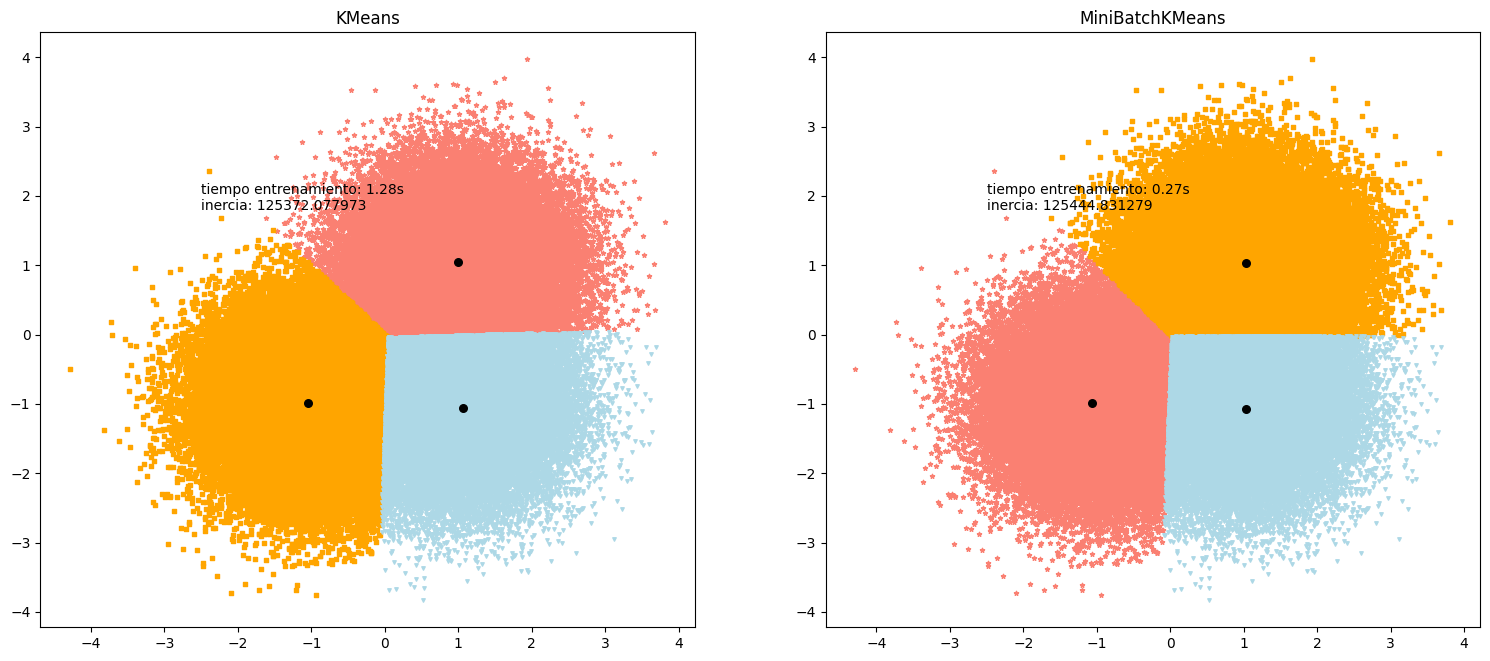

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.datasets import make_blobs

# #############################################################################
np.random.seed(0)
batch_size = 2000
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=150000, centers=centers, cluster_std=0.7)

# #############################################################################
# Clustering con k-means

k_means = KMeans(init="random", n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

# #############################################################################
# Clustering usando MiniBatchKMeans

mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10, #controla early-stopping en función del número consecutivo de mini-lotes que no mejoran el valor de inercia
    verbose=0,
)
# ###########################################################################
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0
# #############################################################################
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
# #############################################################################
y_km = k_means.predict(X)

ax = fig.add_subplot(1, 2, 1)

ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=10, c='salmon', marker='*',  label='Cluster 1')

ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=6, c='orange', marker='s',  label='Cluster 2')

ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=6, c='lightblue', marker='v',  label='Cluster 3')

ax.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=30, marker='o', c='black', label='Centroids')

ax.set_title("KMeans")
#ax.legend()
plt.text(-2.5, 1.8, "tiempo entrenamiento: %.2fs\ninercia: %f" % (t_batch, k_means.inertia_))

# #############################################################################
y_mbk = mbk.predict(X)

ax = fig.add_subplot(1, 2, 2)

ax.scatter(X[y_mbk == 0, 0], X[y_mbk == 0, 1], s=10, c='salmon', marker='*',  label='Cluster 1')

ax.scatter(X[y_mbk == 1, 0], X[y_mbk == 1, 1], s=6, c='orange', marker='s',  label='Cluster 2')

ax.scatter(X[y_mbk == 2, 0], X[y_mbk == 2, 1], s=6, c='lightblue', marker='v', label='Cluster 3')

ax.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], s=30, marker='o', c='black', label='Centroids')

ax.set_title("MiniBatchKMeans")
#ax.legend()
_= plt.text(-2.5, 1.8, "tiempo entrenamiento: %.2fs\ninercia: %f" % (t_mini_batch, mbk.inertia_))